# <center> Data Augmentation </center>


In [1]:
import numpy             as np
import sklearn           as sk
import pandas            as pd
import matplotlib.pyplot as plt
import tensorflow        as tf
import tensorboard       as tb
import scipy             as sc

%load_ext tensorboard

from tensorflow.keras.layers     import Dense
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection     import train_test_split
from scipy.ndimage               import shift
from scipy.ndimage               import rotate


# MINIST TRAIN DEFAULT

---

In [2]:

mnist = pd.read_csv("./mnist_train_small.csv", header=None, sep=';').values

X, Y = mnist[:, 1:], mnist[:, 0:1]

In [3]:

Xt = X / 255
Yt = to_categorical(Y, 10)

X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, train_size=0.7)

In [4]:
model = tf.keras.Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(lr=0.1),
              loss='categorical_crossentropy', 
              metrics=['acc'])          

In [5]:
logdir = "logs/Dense-MNIST"

tf.profiler.experimental.start(logdir=logdir)

arr = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20)

tf.profiler.experimental.stop()

Epoch 1/20
438/438 [==============================] - 2s 4ms/step - loss: 0.5612 - acc: 0.8287 - val_loss: 0.4584 - val_acc: 0.8630
Epoch 2/20
438/438 [==============================] - 2s 4ms/step - loss: 0.2248 - acc: 0.9316 - val_loss: 0.2124 - val_acc: 0.9318
Epoch 3/20
438/438 [==============================] - 2s 5ms/step - loss: 0.1561 - acc: 0.9511 - val_loss: 0.1926 - val_acc: 0.9383
Epoch 4/20
438/438 [==============================] - 2s 5ms/step - loss: 0.1120 - acc: 0.9656 - val_loss: 0.2910 - val_acc: 0.9128
Epoch 5/20
438/438 [==============================] - 2s 5ms/step - loss: 0.0913 - acc: 0.9721 - val_loss: 0.1693 - val_acc: 0.9512
Epoch 6/20
438/438 [==============================] - 3s 6ms/step - loss: 0.0687 - acc: 0.9790 - val_loss: 0.1468 - val_acc: 0.9592
Epoch 7/20
438/438 [==============================] - 3s 6ms/step - loss: 0.0483 - acc: 0.9853 - val_loss: 0.1469 - val_acc: 0.9563
Epoch 8/20
438/438 [==============================] - 3s 7ms/step - loss: 0.

#         <center>     What Happens if you change     
#    a little bit your data set entry? </center> 

---

In [6]:
def traslate_imgs(X):

    trasl_X = np.zeros(X.shape)

    for ix, x in enumerate(X):
        rx = x.reshape(28, 28)
        shift_x = np.random.randint(14) - 7
        shift_y = np.random.randint(14) - 7
        trasl_X[ix] = shift(x.reshape(28, 28), (shift_x, shift_y)).flatten()

    return trasl_X

In [7]:
def rotate_imgs(X):

    rot_X = np.zeros(X.shape)

    for ix, x in enumerate(X):
        rx = x.reshape(28, 28)
        angle = np.random.randint(180) - 90
        rot_X[ix] = rotate(x.reshape(28, 28), angle, reshape=False, prefilter=False, order=2).flatten()
        
    return rot_X

In [8]:
def noise_imgs(X, noise_level=0.5):

    nois_X = np.zeros(X.shape)
    
    for ix, x in enumerate(X):
        rx = x.reshape(28, 28)
        noise = (np.random.random(X[ix].shape) * 2 - 1) * noise_level
        nois_X[ix] = np.clip(x + noise, 0.0, 1.0).flatten()

    return nois_X

In [9]:

#Test augmentation
trasX_test = traslate_imgs(X_test)
rotaX_test = rotate_imgs(X_test)
no50X_test = noise_imgs(X_test, 0.5)
no25X_test = noise_imgs(X_test, 0.25)

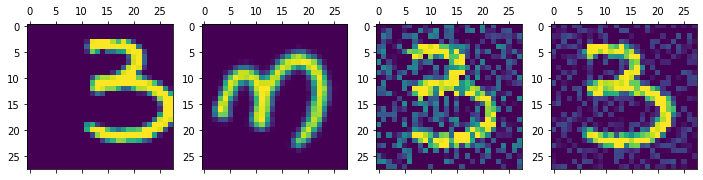

In [10]:
idx = 0

fig, axs = plt.subplots(1,4,figsize=(12,12))

axs[0].matshow(trasX_test[idx,:].reshape(28, 28))
axs[1].matshow(rotaX_test[idx,:].reshape(28, 28))
axs[2].matshow(no50X_test[idx,:].reshape(28, 28))
axs[3].matshow(no25X_test[idx,:].reshape(28, 28))

plt.show()

In [11]:
print("Model Train without Data Augmentation")
print("Accuracy normal:", model.evaluate(X_test,     Y_test, verbose=0)[1] * 100, "%")
print("Accuracy trans.:", model.evaluate(trasX_test, Y_test, verbose=0)[1] * 100, "%")
print("Accuracy rotat.:", model.evaluate(rotaX_test, Y_test, verbose=0)[1] * 100, "%")
print("Accuracy noi50%:", model.evaluate(no50X_test, Y_test, verbose=0)[1] * 100, "%")
print("Accuracy noi25%:", model.evaluate(no25X_test, Y_test, verbose=0)[1] * 100, "%")

Model Train without Data Augmentation
Accuracy normal: 96.53391242027283 %
Accuracy trans.: 22.52957820892334 %
Accuracy rotat.: 49.02516305446625 %
Accuracy noi50%: 87.3521089553833 %
Accuracy noi25%: 95.91735005378723 %


# MINIST TRAIN WITH DATA AUGMENTATION

---

In [12]:

# Train augmentation

trasX_train = traslate_imgs(X_train)
rotaX_train = rotate_imgs(X_train)
no50X_train = noise_imgs(X_train, 0.5)
no25X_train = noise_imgs(X_train, 0.25)


augmX_train = np.vstack([X_train, 
                        trasX_train, 
                        rotaX_train, 
                        no50X_train, 
                        no25X_train])


augmY_train = np.tile(Y_train, (5,1))

idxs = np.random.choice(range(augmX_train.shape[0]), augmX_train.shape[0], replace=False)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


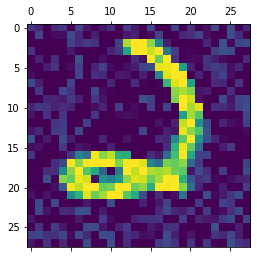

In [13]:
augmX_train.shape

i = 2

plt.matshow(augmX_train[idxs][i,:].reshape(28,28))
print(augmY_train[idxs][i])

In [14]:
model = tf.keras.Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer=SGD(lr=0.05),
              loss='categorical_crossentropy',
              metrics=['acc'])             

In [15]:
logdir = "logs/Dense-MNIST-Data-Augmentation"

tf.profiler.experimental.start(logdir=logdir)

arr = model.fit(augmX_train, augmY_train, validation_data=(X_test, Y_test),
                batch_size=64, epochs=20)

tf.profiler.experimental.stop()


Epoch 1/20
1094/1094 [==============================] - 4s 4ms/step - loss: 1.1045 - acc: 0.6541 - val_loss: 0.3297 - val_acc: 0.9040
Epoch 2/20
1094/1094 [==============================] - 4s 4ms/step - loss: 0.6384 - acc: 0.7955 - val_loss: 0.2093 - val_acc: 0.9368
Epoch 3/20
1094/1094 [==============================] - 5s 5ms/step - loss: 0.4574 - acc: 0.8542 - val_loss: 0.1731 - val_acc: 0.9480
Epoch 4/20
1094/1094 [==============================] - 7s 6ms/step - loss: 0.3562 - acc: 0.8868 - val_loss: 0.1537 - val_acc: 0.9523
Epoch 5/20
1094/1094 [==============================] - 8s 7ms/step - loss: 0.2938 - acc: 0.9068 - val_loss: 0.1556 - val_acc: 0.9528
Epoch 6/20
1094/1094 [==============================] - 7s 6ms/step - loss: 0.2470 - acc: 0.9217 - val_loss: 0.1436 - val_acc: 0.9585
Epoch 7/20
1094/1094 [==============================] - 10s 9ms/step - loss: 0.2127 - acc: 0.9323 - val_loss: 0.1468 - val_acc: 0.9567
Epoch 8/20
1094/1094 [==============================] - 12s 1

In [16]:
print("Model Train with Data Augmentation")
print("Accuracy normal:", model.evaluate(X_test,     Y_test, verbose=0)[1] * 100,"%")
print("Accuracy trans.:", model.evaluate(trasX_test, Y_test, verbose=0)[1] * 100,"%")
print("Accuracy rotat.:", model.evaluate(rotaX_test, Y_test, verbose=0)[1] * 100,"%")
print("Accuracy noi50%:", model.evaluate(no50X_test, Y_test, verbose=0)[1] * 100,"%")
print("Accuracy noi25%:", model.evaluate(no25X_test, Y_test, verbose=0)[1] * 100,"%")

Model Train with Data Augmentation
Accuracy normal: 95.7673728466034 %
Accuracy trans.: 82.18629956245422 %
Accuracy rotat.: 88.38527202606201 %
Accuracy noi50%: 93.40109825134277 %
Accuracy noi25%: 95.88401913642883 %


In [17]:
# Default port localhost:6006 or 127.0.0.0:6006, if you dont have DNS
# the integration of tensorboard not is so good, I dont know how close tensorboard without kill

# %tensorboard --logdir="logs"

## Cange Dataset to breast cancer wisconsin

---


In [18]:
cancer_data = pd.read_csv("./breast_cancer_wisconsin.csv", index_col=0)

X = cancer_data.iloc[:, 1:]
Y = cancer_data.iloc[:, 0].map({'M':1, 'B':0})[:, np.newaxis]

cols = X.columns

In [19]:
tX = ((X - np.mean(X, axis=0)) / np.std(X, axis=0)).values
tY =  Y

X_train, X_test, Y_train, Y_test = train_test_split(tX, tY.ravel(), test_size=0.3)

# Default Train

---

In [20]:
model = tf.keras.Sequential()

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(lr=0.1),
              loss='binary_crossentropy',   
              metrics=['acc'])      

In [21]:
logdir = "logs/Dense-breast_cancer_wisconsin"

tf.profiler.experimental.start(logdir=logdir)

arr = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=8, epochs=20)

tf.profiler.experimental.stop()


Epoch 1/20
50/50 [==============================] - 0s 7ms/step - loss: 0.6720 - acc: 0.6231 - val_loss: 0.6623 - val_acc: 0.6257
Epoch 2/20
50/50 [==============================] - 0s 4ms/step - loss: 0.6614 - acc: 0.6281 - val_loss: 0.6615 - val_acc: 0.6257
Epoch 3/20
50/50 [==============================] - 0s 5ms/step - loss: 0.6613 - acc: 0.6281 - val_loss: 0.6613 - val_acc: 0.6257
Epoch 4/20
50/50 [==============================] - 0s 5ms/step - loss: 0.6610 - acc: 0.6281 - val_loss: 0.6612 - val_acc: 0.6257
Epoch 5/20
50/50 [==============================] - 0s 5ms/step - loss: 0.6614 - acc: 0.6281 - val_loss: 0.6613 - val_acc: 0.6257
Epoch 6/20
50/50 [==============================] - 0s 5ms/step - loss: 0.6608 - acc: 0.6281 - val_loss: 0.6613 - val_acc: 0.6257
Epoch 7/20
50/50 [==============================] - 0s 5ms/step - loss: 0.6615 - acc: 0.6281 - val_loss: 0.6612 - val_acc: 0.6257
Epoch 8/20
50/50 [==============================] - 0s 5ms/step - loss: 0.6613 - acc: 0.62


# breast cancer wisconsin with Data Augmentation or not?

---


## why not?

>>  <p>
     well i don´t know if a little changes into data, change the label of the entry, 
      i don´t a doctor, with MNIST a know if is a number, but know if cancer or not, 
      i don´t know how
  </p>

